# 1.Collect Initial Data

In [1]:
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
file_names = [os.path.basename(x) for x in glob.glob("..\\..\\Datos\\initial\\[!~]*.xlsx")]
dir_files = glob.glob("..\\..\\Datos\\initial\\[!~]*.xlsx")

print(file_names)


['AltosDelValle_Cotizaciones.xlsx', 'AltosDelValle_Negocios.xlsx', 'Junge_Cotizaciones.xlsx', 'Junge_Negocios.xlsx', 'Mil610_Cotizaciones.xlsx', 'Mil610_Negocios.xlsx', 'SanAndresDelValle_Cotizaciones.xlsx', 'SanAndresDelValle_Negocios.xlsx', 'Urban_Cotizaciones.xlsx', 'Urban_Negocios.xlsx']


In [3]:
project_names = [];project_types = [];project_file_types = []

for file in file_names:
    project_names.append(file.split('_')[0])
    project_types.append(file.split('_')[1].split('.')[0])
    project_file_types.append(file.split('.')[1])

In [4]:
df_list = []

for file_dir in dir_files:
    df = pd.read_excel(file_dir,header=0)
    df_list.append(df)


In [5]:
def get_col_group_description(df, col):
    num_cot = []
    info = dict()
    for group, frame in df.groupby(col):
        num_cot.append(len(frame))
    cot_serie = pd.Series(num_cot)
    info['count'] = cot_serie.count()
    info['max'] = cot_serie.max()
    info['mean'] = cot_serie.mean()
    info['std'] = cot_serie.std()
    return info

# 2 Cotizacion Data

## 2.1 Analysis File by File

In [6]:
cot_resume = pd.DataFrame()

cot_index = [index for index in range(0,len(project_types)) if project_types[index] == 'Cotizaciones']
cot_names = [project_names[index] for index in range(0,len(project_names)) if index in cot_index]
cot_types = [project_types[index] for index in range(0,len(project_types)) if index in cot_index]
cot_ftypes = [project_file_types[index] for index in range(0,len(project_file_types)) if index in cot_index]

cot = [df_list[index] for index in range(0,len(df_list)) if index in cot_index]

#start description
cot_resume['filas'] = [x.shape[0] for x in cot]
cot_resume['proyecto'] = cot_names
cot_resume['cols'] = [x.shape[1] for x in cot]
cot_resume['fecha_inicial'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).min() for x in cot]
cot_resume['fecha_utlima'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).max() for x in cot]
cot_resume['ruts_unicos'] = [x['RUT'].nunique() for x in cot]
cot_resume['cot_ruts_mean'] = [get_col_group_description(x,'RUT')['mean'] for x in cot]
cot_resume['cot_ruts_mean'] = [get_col_group_description(x,'RUT')['std'] for x in cot]
cot_resume['cot_ruts_max'] = [get_col_group_description(x,'RUT')['max'] for x in cot]

# Ubicación

In [7]:
# altos, junge, mil610, sanandresdelvalle, urban
productos = ['deptos', 'deptos', 'deptos', 'casa', 'deptos']
dirr = ['Calle Nueva 820', 'LOS CASTAÑOS 1533', 'Avenida Nahuelbuta 1610', 'Parques de Carriel 5250 ', 'Orompello 1470']
sector = ['Las Monjas, Lomas de San Andrés', 'QUINTA JUNGE', 'Península de Andalué', 'esquina Tierras Coloradas', 'Centro']
ciudad = ['Concepción', 'Concepción', 'San Pedro de la Paz', 'Concepción', 'Concepción']

cot_resume['productos'] = productos
cot_resume['direccion'] = dirr
cot_resume['sector'] = sector
cot_resume['comuna'] = ciudad

In [8]:
# from geopy.geocoders import Nominatim

# def get_latlong(direc):
#     geolocator = Nominatim(user_agent="my-application")
#     location = geolocator.geocode(direc)
#     return location.latitude, location.longitude

# get_latlong(dirr[3] + ', ' + ciudad[3])

In [9]:
# import requests

# address = dirr[2] + ', ' + ciudad[2]
# address.replace(' ','+')
# # response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA')
# response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={}'.format(address))

# resp_json_payload = response.json()

# print(resp_json_payload['results'][0]['geometry']['location'])

In [10]:
# lat, long = [], []
# for i in range(0,5):
#     address = dirr[i] + ', ' + ciudad[i] + ', Chile'
#     address = address.replace(' ','+')
#     print(address)
#     response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={}'.format(address))
#     resp_json_payload = response.json()
#     print(resp_json_payload['results'][0]['geometry']['location'])

In [11]:
lat = [-36.7880, -36.8504918, -36.8575189, -36.7732215, -36.8145]
lng = [-73.0506, -73.0486555, -73.1022302, -73.0507346,  -73.0512]

In [12]:
# import folium
# cp = folium.Map(location=[-36.8269900, -73.0497700], zoom_start=12,tiles='cartodbpositron')
# # [folium.CircleMarker(sample_coords[i], radius=1, color='#0080bb', fill_color='#0080bb').add_to(cp)]

# for i in range(0,len(lat)):
#     try:
#         folium.Marker(
#             location=[lat[i], lng[i]],
#             popup=cot_resume.proyecto[i],
#             icon=folium.Icon(icon='home')
#         ).add_to(cp)
#     except ValueError:
#         pass
# cp.add_child(folium.LatLngPopup())
# cp

## 2.2 Files Resumen

In [13]:
cot_resume.set_index('proyecto').T

proyecto,AltosDelValle,Junge,Mil610,SanAndresDelValle,Urban
filas,496,830,1791,10558,2917
cols,41,41,41,41,41
fecha_inicial,2017-07-27 15:46:54,2016-01-19 08:53:16,2016-09-22 16:36:03,2013-08-19 16:58:26,2017-03-24 18:36:24
fecha_utlima,2018-05-20 17:58:24.067000,2018-05-21 17:33:47,2018-05-22 13:33:02,2018-05-22 13:42:53,2018-05-22 13:27:15
ruts_unicos,257,335,775,3816,1365
cot_ruts_mean,1.35603,2.40607,1.89111,2.78069,1.64508
cot_ruts_max,10,20,16,45,13
productos,deptos,deptos,deptos,casa,deptos
direccion,Calle Nueva 820,LOS CASTAÑOS 1533,Avenida Nahuelbuta 1610,Parques de Carriel 5250,Orompello 1470
sector,"Las Monjas, Lomas de San Andrés",QUINTA JUNGE,Península de Andalué,esquina Tierras Coloradas,Centro


## 2.3 Files Describe

In [14]:
cot_resume.describe()

,filas,cols,ruts_unicos,cot_ruts_mean,cot_ruts_max
count,5.000000,5.0,5.000000,5.000000,5.000000
mean,3318.400000,41.0,1309.600000,2.015796,20.800000
std,4155.236371,0.0,1468.734081,0.575681,14.024978
min,496.000000,41.0,257.000000,1.356033,10.000000
25%,830.000000,41.0,335.000000,1.645081,13.000000
50%,1791.000000,41.0,775.000000,1.891111,16.000000
75%,2917.000000,41.0,1365.000000,2.406069,20.000000
max,10558.000000,41.0,3816.000000,2.780687,45.000000


## 2.4 All files Merged Analysis

In [15]:
# concat cotizaciones
cot_all = pd.concat(cot)
cot_all.to_excel('..\\..\\Datos\\working\\cotizaciones_all.xlsx')

cot_all_resume = pd.DataFrame()
cot_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16592 entries, 0 to 2916
Data columns (total 41 columns):
ID                     16592 non-null int64
Fecha Cotizacion       16592 non-null datetime64[ns]
Medio                  16592 non-null object
Tipo de Medio          16060 non-null object
Proyecto               16592 non-null object
Etapa                  16592 non-null object
Productos              16509 non-null object
Presencial             14565 non-null object
Remoto                 13282 non-null object
Jefe Comercial         16592 non-null object
Ejecutivo Comercial    16592 non-null object
Total Productos        16562 non-null float64
Descuentos             16548 non-null float64
Valor Final Venta      16548 non-null float64
RUT                    16592 non-null object
Nombre                 16592 non-null object
Apellido 1             16553 non-null object
Apellido 2             16185 non-null object
Nombre Completo        16592 non-null object
Telefono               1994

In [16]:
tab_info=pd.DataFrame(cot_all.dtypes).T.rename(index={0:'Tipo Columna'})
tab_info=tab_info.append(pd.DataFrame(cot_all.isnull().sum()).T.rename(index={0:'Valores Nulos'}))
# tab_info=tab_info.append(pd.DataFrame(cot_all.isnull().sum()/cot_all.shape[0]*100).T.rename(index={0:'null values (%)'}))
cot_all_info = tab_info.T
total_filas = cot_all.shape[0]

personas_in_feature = []
cot_personas = cot_all.groupby('RUT')

tmp_per_dict = dict()
for group, frame in cot_personas:
    for feature in cot_all.columns.tolist():
        # revisa si el key ya esta creado
        if feature not in tmp_per_dict.keys():
            tmp_per_dict[feature] = 0
#             print(feature, ',', 'filas: ', frame[feature].shape[0], ',', 'No Nulos: ', frame[feature].count())
        if frame[feature].count() > 0 and frame[feature].shape[0] != frame[feature].count():
            pass
        if False in frame[feature].isnull().tolist():
            tmp_per_dict[feature] += 1

print(cot_all.columns.shape[0],len(tmp_per_dict.keys()))

41 41


In [17]:
cot_all_info['Valores Unicos'] = [cot_all[x].nunique() for x in cot_all.columns]
cot_all_info['Total Filas'] = total_filas
cot_all_info['Entregaron'] = [tmp_per_dict[x] for x in cot_all.columns.tolist()]
cot_all_info

,Tipo Columna,Valores Nulos,Valores Unicos,Total Filas,Entregaron
ID,int64,0,16592,16592,6184
Fecha Cotizacion,datetime64[ns],0,16589,16592,6184
Medio,object,0,12,16592,6184
Tipo de Medio,object,532,31,16592,5990
Proyecto,object,0,5,16592,6184
Etapa,object,0,12,16592,6184
Productos,object,83,3534,16592,6182
Presencial,object,2027,2,16592,5438
Remoto,object,3310,2,16592,4984
Jefe Comercial,object,0,3,16592,6184


## 2.5 Atributtes Null Chart

C:\Users\joaquin\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


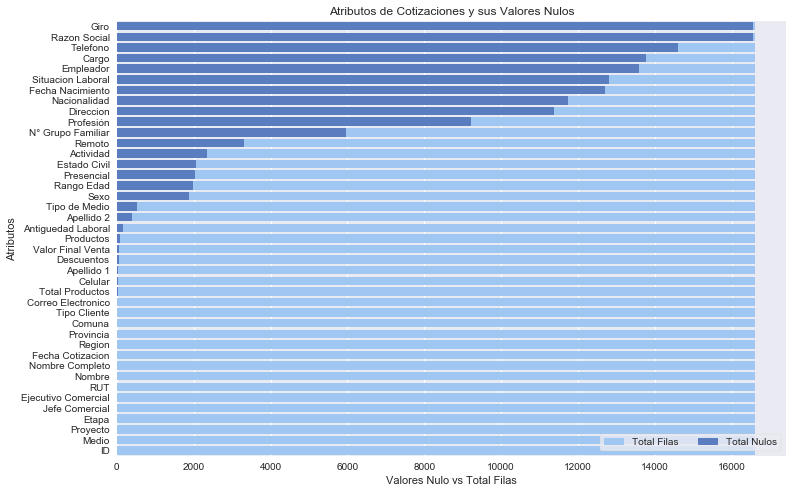

In [18]:
df = cot_all
null_columns = df.columns[df.isnull().any()]
nulos = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

null_df = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=null_df.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
plt.title('Atributos de Cotizaciones y sus Valores Nulos')
f.savefig("..\\results\\cot_all_attributes.png", dpi=400, bbox_inches = 'tight')

# 3 Negocios Data

## 3.1 Analysis File by File 

In [19]:
neg_resume = pd.DataFrame()

neg_index = [index for index in range(0,len(project_types)) if project_types[index] == 'Negocios']
neg_names = [project_names[index] for index in range(0,len(project_names)) if index in neg_index]
neg_types = [project_types[index] for index in range(0,len(project_types)) if index in neg_index]
neg_ftypes = [project_file_types[index] for index in range(0,len(project_file_types)) if index in neg_index]

neg = [df_list[index] for index in range(0,len(df_list)) if index in neg_index]

#start description
neg_resume['filas'] = [x.shape[0] for x in neg]
neg_resume['proyecto'] = neg_names
neg_resume['cols'] = [x.shape[1] for x in neg]
neg_resume['fecha_min'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).min() for x in neg]
neg_resume['fecha_max'] = [pd.to_datetime(x['Fecha Cotizacion'].tolist()).max() for x in neg]
neg_resume['ruts_unicos'] = [len(x['RUT'].unique()) for x in neg]
neg_resume['ruts_mean'] = [get_col_group_description(x,'RUT')['mean'] for x in neg]
neg_resume['ruts_std'] = [get_col_group_description(x,'RUT')['std'] for x in neg]
neg_resume['ruts_max'] = [get_col_group_description(x,'RUT')['max'] for x in neg]


neg_resume['#es_escriturado']  = [(len(x[x['Estado'] == 'Escriturado'])) for x,y in zip(neg,neg_resume['filas'])]
neg_resume['#es_entregado']  = [(len(x[x['Estado'] == 'Entregado'])) for x,y in zip(neg,neg_resume['filas'])]
neg_resume['#vendidos']  = neg_resume['#es_entregado'] + neg_resume['#es_escriturado']
neg_resume['%es_anulados']  = [(len(x[x['Estado'] == 'Anulada'])/y) for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_promesas']  = [(len(x[x['Estado'] == 'Promesado'])/y) for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_reserva']   = [len(x[x['Estado'] == 'Reservado'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%es_entregado']  = [(len(x[x['Estado'] == 'Entregado'])/y) for x,y in zip(neg,neg_resume['filas'])]
# neg_resume['%es_reserva']   = [len(x[x['Estado'] == 'Reservado'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%esc_desistido'] = [len(x[x['Estado Comercial'] == 'Desistimiento'])/y for x,y in zip(neg,neg_resume['filas'])]
neg_resume['%esc_normal']    = [len(x[x['Estado Comercial'] == 'Normal'])/y for x,y in zip(neg,neg_resume['filas'])]

## 3.2 Resumen

In [20]:
neg_resume.set_index('proyecto').T

proyecto,AltosDelValle,Junge,Mil610,SanAndresDelValle,Urban
filas,108,101,87,1848,203
cols,49,49,49,49,49
fecha_min,2017-07-27 15:46:58.750000,2016-01-25 13:21:02.013000,2016-09-26 16:12:56.703000,2013-08-19 18:35:56.620000,2017-03-27 17:03:29.563000
fecha_max,2018-05-07 16:29:32.157000,2018-04-18 18:25:01.797000,2018-05-17 11:55:49.837000,2018-05-21 17:12:31.210000,2018-05-20 18:10:29.167000
ruts_unicos,63,52,54,820,124
ruts_mean,1.71429,1.94231,1.61111,2.25366,1.6371
ruts_std,1.31282,1.48738,0.877747,1.80734,1.17795
ruts_max,7,7,5,17,8
#es_escriturado,0,27,29,201,0
#es_entregado,0,0,0,34,0


## 3.2 Describe

In [21]:
neg_resume.describe()

,filas,cols,ruts_unicos,ruts_mean,ruts_std,ruts_max,#es_escriturado,#es_entregado,#vendidos,%es_anulados,%es_promesas,%es_reserva,%es_entregado,%esc_desistido,%esc_normal
count,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,469.400000,49.0,222.600000,1.831692,1.332646,8.800000,51.400000,6.800000,58.200000,0.577628,0.168972,0.107835,0.003680,0.103676,0.857503
std,772.020919,0.0,335.265268,0.269536,0.346602,4.711688,84.795637,15.205262,99.823344,0.092131,0.121698,0.040010,0.008228,0.043578,0.054895
min,87.000000,49.0,52.000000,1.611111,0.877747,5.000000,0.000000,0.000000,0.000000,0.492611,0.079208,0.064815,0.000000,0.046296,0.801980
25%,101.000000,49.0,54.000000,1.637097,1.177946,7.000000,0.000000,0.000000,0.000000,0.517241,0.080460,0.068966,0.000000,0.068966,0.830087
50%,108.000000,49.0,63.000000,1.714286,1.312822,7.000000,27.000000,0.000000,27.000000,0.524752,0.094697,0.119048,0.000000,0.126623,0.837438
75%,203.000000,49.0,124.000000,1.942308,1.487378,8.000000,29.000000,0.000000,29.000000,0.659091,0.240741,0.128713,0.000000,0.128713,0.873563
max,1848.000000,49.0,820.000000,2.253659,1.807338,17.000000,201.000000,34.000000,235.000000,0.694444,0.349754,0.157635,0.018398,0.147783,0.944444


In [22]:
print("Cot rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Cot rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Cot por rut maximo: ",get_col_group_description(df,'RUT')['max'])

Cot rut promedio:  2.683053040103493
Cot rut desviacion:  2.6119688668842644
Cot por rut maximo:  45


## 3.3 All Files Merge Analysis

In [23]:
neg_all = pd.concat(neg)
neg_all.to_excel('..\\..\\Datos\\working\\negocios_all.xlsx')
neg_all_resume = pd.DataFrame()

In [24]:
neg_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 202
Data columns (total 49 columns):
ID                               2347 non-null int64
Fecha Cotizacion                 2347 non-null datetime64[ns]
ID Cotizacion                    2347 non-null int64
Medio                            2347 non-null object
Tipo de Medio                    2347 non-null object
Proyecto                         2347 non-null object
Etapa                            2347 non-null object
Productos                        2322 non-null object
Jefe Comercial                   2347 non-null object
Ejecutivo Comercial              2347 non-null object
Total Productos                  2347 non-null float64
Descuentos                       2344 non-null float64
Valor Final Venta                2344 non-null float64
Estado                           2347 non-null object
Estado Comercial                 2347 non-null object
Fecha Promesa                    583 non-null datetime64[ns]
Fecha Escritur

In [25]:
tab_info=pd.DataFrame(neg_all.dtypes).T.rename(index={0:'Tipo Columna'})
tab_info=tab_info.append(pd.DataFrame(neg_all.isnull().sum()).T.rename(index={0:'Valores Nulos'}))
# tab_info=tab_info.append(pd.DataFrame(cot_all.isnull().sum()/cot_all.shape[0]*100).T.rename(index={0:'null values (%)'}))
neg_all_info = tab_info.T
neg_all_info['Valores Unicos'] = [neg_all[x].nunique() for x in neg_all.columns]
neg_all_info['Total Filas'] = neg_all.shape[0]
neg_all_info

,Tipo Columna,Valores Nulos,Valores Unicos,Total Filas
ID,int64,0,2347,2347
Fecha Cotizacion,datetime64[ns],0,2347,2347
ID Cotizacion,int64,0,2340,2347
Medio,object,0,12,2347
Tipo de Medio,object,0,29,2347
Proyecto,object,0,5,2347
Etapa,object,0,12,2347
Productos,object,25,612,2347
Jefe Comercial,object,0,3,2347
Ejecutivo Comercial,object,0,43,2347


## 3.3 Atributtes Null Chart

C:\Users\joaquin\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


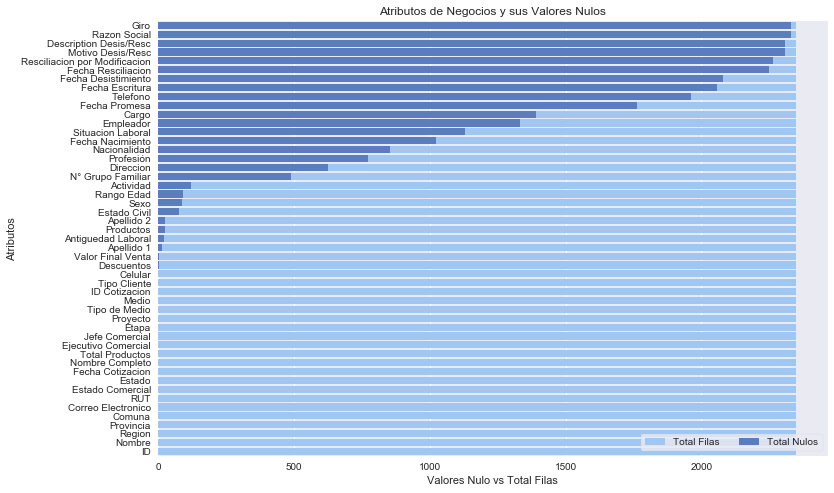

In [26]:
df = neg_all
#view columns with null only
# null_columns = df.columns[df.isnull().any()]
# null_df = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

nulos = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=nulos.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
plt.title('Atributos de Negocios y sus Valores Nulos')
f.savefig("..\\results\\neg_all_attributes.png", dpi=400, bbox_inches = 'tight')

C:\Users\joaquin\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


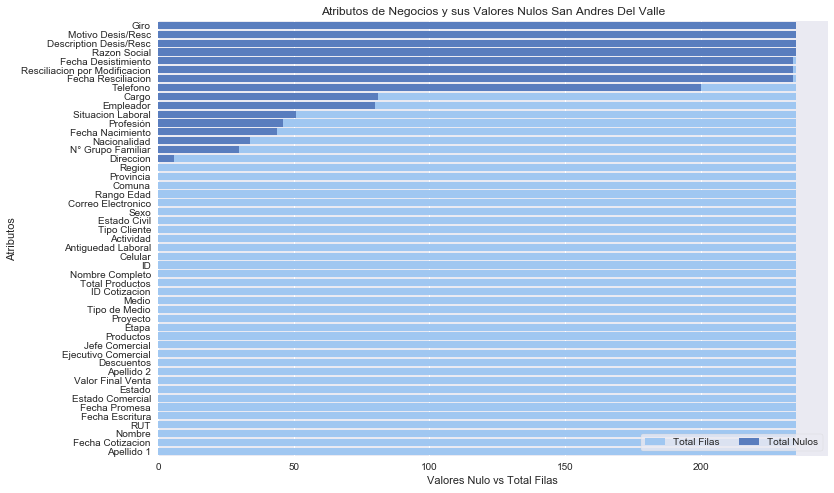

In [27]:
proyecto = 'San Andres Del Valle'
df = neg_all[(neg_all['Proyecto'] == proyecto) ]
df = df[(df['Estado'] == 'Escriturado') | (df['Estado'] == 'Entregado')]
#view columns with null only
# null_columns = df.columns[df.isnull().any()]
# null_df = df[null_columns].isnull().sum()

#view all columns with its null count
null_columns = df.columns
null_df =  df.shape[0] - df.count()

nulos = pd.DataFrame({'Total':null_df,'Etiquetas':null_columns})

columnas = null_columns.copy()
filas = [df.shape[0]] * len(null_columns)

totales = pd.DataFrame({'Total':filas,'Etiquetas':columnas})

f, ax = plt.subplots(figsize=(12, 8))

sb.set_color_codes("pastel")
sb.barplot(data=totales.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Filas")

sb.set_color_codes("muted")
sb.barplot(data=nulos.sort_values(by='Total',ascending=False), x='Total', y='Etiquetas',color="b",label="Total Nulos")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Atributos", xlabel="Valores Nulo vs Total Filas")
plt.title('Atributos de Negocios y sus Valores Nulos {}'.format(proyecto))
f.savefig("..\\results\\neg_all_attributes.png", dpi=400, bbox_inches = 'tight')